# TPZ lite

In [5]:
import pandas as pd
import rail
import qp
from rail.core.data import TableHandle
from rail.core.stage import RailStage

#### Criando o data frame com os dados finais, já feitos os cortes de magnitudes:

In [110]:
data = pd.read_csv("trainingSetData.csv", usecols=["redshift","mag_u_lsst","mag_g_lsst","mag_r_lsst","mag_i_lsst","mag_z_lsst","mag_y_lsst","mag_err_u_lsst","mag_err_g_lsst","mag_err_r_lsst","mag_err_i_lsst","mag_err_z_lsst","mag_err_y_lsst"])

In [111]:
data

,redshift,mag_u_lsst,mag_g_lsst,mag_r_lsst,mag_i_lsst,mag_z_lsst,mag_y_lsst,mag_err_u_lsst,mag_err_g_lsst,mag_err_r_lsst,mag_err_i_lsst,mag_err_z_lsst,mag_err_y_lsst
0,1.018660,23.498725,23.561816,23.512837,23.202372,22.775913,22.708900,0.024260,0.009639,0.006969,0.009179,0.009714,0.027580
1,0.647496,25.873583,25.604938,25.002151,24.522641,24.404252,24.299398,0.165206,0.042831,0.021633,0.025991,0.043524,0.119341
2,0.617298,25.175977,24.749178,23.957213,23.332856,23.120089,22.926749,0.090350,0.021816,0.009554,0.010102,0.013337,0.033708
3,1.063110,24.439455,24.634688,24.288070,23.886360,23.290917,23.152775,0.049246,0.020035,0.012244,0.015450,0.015610,0.041509
4,1.473160,25.186439,24.921933,24.841972,24.449685,24.193905,23.529613,0.091156,0.024867,0.018972,0.024451,0.035858,0.058732
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86470,0.612524,25.853557,24.917695,23.688058,22.929878,22.715367,22.550215,0.162323,0.024787,0.007873,0.007558,0.009187,0.023830
86471,0.530211,21.316828,20.811005,19.936949,19.452047,19.260848,18.965879,0.006526,0.005000,0.005000,0.005000,0.005000,0.005000
86472,0.271550,23.729099,21.906851,20.514429,19.951494,19.668220,19.426484,0.028619,0.005000,0.005000,0.005000,0.005000,0.005000
86473,2.202400,24.200782,23.872385,23.805646,23.868890,23.853008,23.727188,0.040821,0.011767,0.008560,0.015238,0.026196,0.070454


In [6]:
DS = RailStage.data_store
DS.__class__.allow_overwrite = True

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tables_io

In [14]:
from rail.estimation.algos.tpz_lite import TPZliteInformer

In [15]:
from rail.core.utils import RAILDIR

In [67]:
from rail.core.utils import find_rail_file

In [117]:
import h5py

## Training set: 10% da amostra original

In [163]:
fraction = 0.1
training_csv = data.sample(round(len(data)*fraction),random_state=40)

Para que o arquivo hdf5 estivesse no formato correto, foi necessário transformar o data frame em um dicionário com o parâmetro "orient='list'", de modo que  'list’ : dict like {column -> [values]} 

#### Criando o dicionário do dataframe:

In [165]:
dict_list = training_csv.to_dict(orient='list')


#### Craindo o arquivo hdf5:

In [166]:
hdf5_file_path = '/Users/andreiadourado/miniforge3/envs/tpzlite/lib/python3.12/site-packages/teste9.hdf5'

#### Escrevendo os valores do dicionário no arquivo hdf5:

In [167]:
with h5py.File(hdf5_file_path, 'w') as hdf5_file:
    photometry_group = hdf5_file.create_group('photometry')
    def write_dict(group, data):
        for key, value in data.items():
                group[str(key)] = value
    write_dict(photometry_group, dict_list)

In [168]:
datafile = os.path.join(RAILDIR,"/Users/andreiadourado/miniforge3/envs/tpzlite/lib/python3.12/site-packages/teste9.hdf5")

#### Criando o arquivo training_data:

In [169]:
training_data = DS.read_file("training_data", TableHandle, datafile)

In [170]:
print(training_data.data)

OrderedDict({'photometry': OrderedDict({'mag_err_g_lsst': array([0.01318237, 0.01908804, 0.01191375, ..., 0.01081367, 0.0353369 ,
       0.01040443]), 'mag_err_i_lsst': array([0.005     , 0.01840225, 0.005     , ..., 0.005     , 0.01259545,
       0.0134211 ]), 'mag_err_r_lsst': array([0.005     , 0.01303433, 0.005     , ..., 0.005     , 0.01666866,
       0.00861168]), 'mag_err_u_lsst': array([0.06418678, 0.04389146, 0.1048881 , ..., 0.1221016 , 0.14382928,
       0.02710067]), 'mag_err_y_lsst': array([0.00914046, 0.04335007, 0.005     , ..., 0.00808909, 0.04966847,
       0.03737698]), 'mag_err_z_lsst': array([0.005     , 0.0211179 , 0.005     , ..., 0.005     , 0.01720027,
       0.02014127]), 'mag_g_lsst': array([24.04273884, 24.56878626, 23.89124783, ..., 23.74273177,
       25.36877275, 23.68260727]), 'mag_i_lsst': array([21.95967538, 24.10443406, 21.26971154, ..., 21.87050835,
       23.62490014, 23.7070142 ]), 'mag_r_lsst': array([22.92381785, 24.36929677, 22.40061785, ..., 22.

## Running TPZ

In [171]:
bands = ["u", "g", "r", "i", "z", "y"]
new_err_dict = {}
attribute_list = []
for band in bands:
    attribute_list.append(f"mag_{band}_lsst")
    new_err_dict[f"mag_{band}_lsst"] = f"mag_err_{band}_lsst"
# redshift is also an attribute used in the training, but it does not have an associated
# error its entry in the err_dict should be set to "None"
new_err_dict["redshift"] = None

print(new_err_dict)

{'mag_u_lsst': 'mag_err_u_lsst', 'mag_g_lsst': 'mag_err_g_lsst', 'mag_r_lsst': 'mag_err_r_lsst', 'mag_i_lsst': 'mag_err_i_lsst', 'mag_z_lsst': 'mag_err_z_lsst', 'mag_y_lsst': 'mag_err_y_lsst', 'redshift': None}


In [172]:
tpz_dict = dict(zmin=min(training_csv['redshift']), 
                zmax=max(training_csv['redshift']), 
                nzbins=301, 
                hdf5_groupname='photometry',
                use_atts=attribute_list,
                err_dict=new_err_dict,
                nrandom=2, 
                ntrees=4)

In [173]:
pz_train = TPZliteInformer.make_stage(name='inform_TPZ', model='demo_tpz.pkl', **tpz_dict)

In [174]:
%%time
pz_train.inform(training_data)

creating 2 random realizations...
making a total of 8 trees for 2 random realizations * 4 bootstraps
making 1 of 8...
making 2 of 8...
making 3 of 8...
making 4 of 8...
making 5 of 8...
making 6 of 8...
making 7 of 8...
making 8 of 8...
Inserting handle into data store.  model_inform_TPZ: inprogress_demo_tpz.pkl, inform_TPZ
CPU times: user 2min 20s, sys: 860 ms, total: 2min 20s
Wall time: 2min 23s


## Running the Estimate stage

#### Selecionando 10% do restante da amostra:

In [175]:
validation_csv = data.drop(training_csv.index)

In [177]:
fraction = 0.1
validation = data.sample(round(len(validation_csv)*fraction),random_state=40)

#### Escrevendo o arquivo hdf5, analogamente ao training set:

In [179]:
dict_list = validation.to_dict(orient='list')

In [180]:
hdf5_file_path = '/Users/andreiadourado/miniforge3/envs/tpzlite/lib/python3.12/site-packages/teste10.hdf5'

In [181]:
with h5py.File(hdf5_file_path, 'w') as hdf5_file:
    photometry_group = hdf5_file.create_group('photometry')
    def write_dict(group, data):
        for key, value in data.items():
                group[str(key)] = value
    write_dict(photometry_group, dict_list)

#### Criando o arquivo test_data:

In [182]:
from rail.estimation.algos.tpz_lite import TPZliteEstimator

In [183]:
testfile = os.path.join(RAILDIR,"/Users/andreiadourado/miniforge3/envs/tpzlite/lib/python3.12/site-packages/teste10.hdf5")

In [184]:
test_data = DS.read_file("test_data", TableHandle, testfile)

#### Run:

In [187]:
test_dict = dict(hdf5_groupname='photometry')

In [188]:
test_runner = TPZliteEstimator.make_stage(name="test_tpz", output="TPZ_demo_output.hdf5",
                                          model=pz_train.get_handle('model'), **test_dict)

In [189]:
%%time
results = test_runner.estimate(test_data)

Process 0 running estimator on chunk 0 - 7783
loading 8 total trees from model


/Users/andreiadourado/rail_tpz/src/rail/estimation/algos/mlz_utils/utils_mlz.py:127: RuntimeWarning: divide by zero encountered in scalar divide
  ef = ((e68 - e681) / (area - area1)) * (0.68 - area1) + e681


Inserting handle into data store.  output_test_tpz: inprogress_TPZ_demo_output.hdf5, test_tpz
CPU times: user 4.67 s, sys: 672 ms, total: 5.34 s
Wall time: 5.59 s


## Plotting point estimates and an example PDF

In [190]:
sz = test_data()['photometry']['redshift']
zmode = results().ancil['zmode']

Text(0, 0.5, 'TPZ mode')

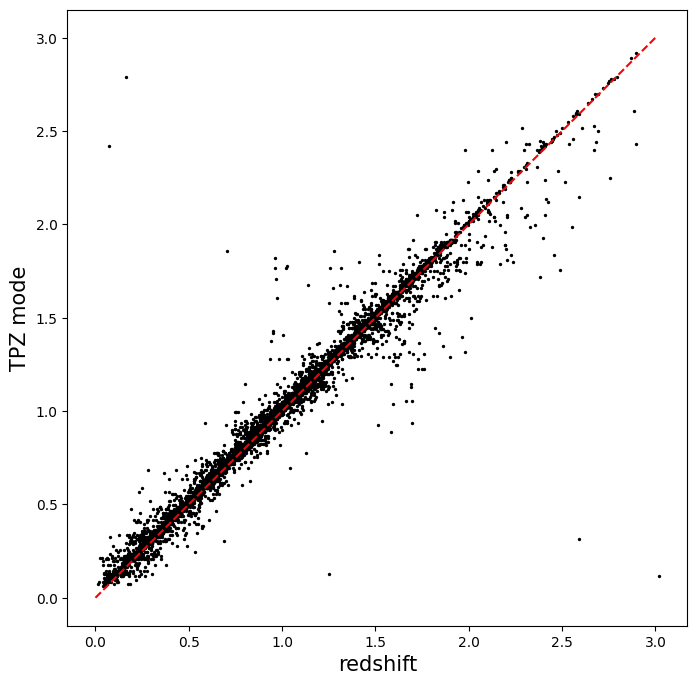

In [191]:
plt.figure(figsize=(8,8))
plt.scatter(sz,zmode, s=2,c='k')
plt.plot([0,3],[0,3],'r--')
plt.xlabel("redshift", fontsize=15)
plt.ylabel("TPZ mode", fontsize=15)

Text(0.5, 0, 'redshift')

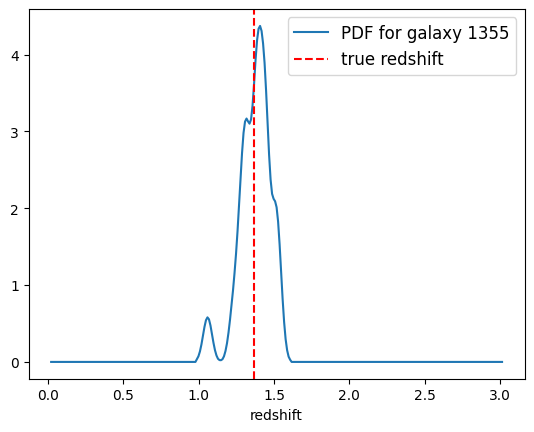

In [192]:
which=1355
fig, axs = plt.subplots()
results().plot_native(key=which,axes=axs, label=f"PDF for galaxy {which}")
axs.axvline(sz[which],c='r',ls='--', label="true redshift")
plt.legend(loc='upper right', fontsize=12)
axs.set_xlabel("redshift")